<h1>Chicago Crimes</h1>
<h2>Hands On Exam</h2>
<hr>
<h3>Mariscotes ,Jercel E.</h3>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import folium
from folium.plugins import HeatMap
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cc = pd.read_csv('datasets\\Chicago_Crimes.csv')
cc

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


<h1>Descriptive Analytics</h1>

In [3]:
cc.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.491230e+05,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000
mean,1.358652e+07,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845
std,6.473192e+05,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875
min,2.807300e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567
25%,1.352322e+07,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071
50%,1.361560e+07,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690
75%,1.370865e+07,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233
max,1.381045e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531


In [4]:
cc.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,249123.0,1.358652e+07,647319.161410,2.807300e+04,1.352322e+07,1.361560e+07,1.370865e+07,1.381045e+07
Beat,249123.0,1.153846e+03,707.959752,1.110000e+02,5.330000e+02,1.034000e+03,1.732000e+03,2.535000e+03
District,249123.0,1.130892e+01,7.074807,1.000000e+00,5.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,249123.0,2.318682e+01,13.925951,1.000000e+00,1.000000e+01,2.300000e+01,3.400000e+01,5.000000e+01
Community Area,249120.0,3.623856e+01,21.567485,1.000000e+00,2.200000e+01,3.200000e+01,5.300000e+01,7.700000e+01
X Coordinate,249033.0,1.165309e+06,16168.139632,1.092647e+06,1.153981e+06,1.167190e+06,1.176662e+06,1.205119e+06
Y Coordinate,249033.0,1.887602e+06,31462.770629,1.813897e+06,1.860560e+06,1.894278e+06,1.910282e+06,1.951517e+06
Year,249123.0,2.024242e+03,0.428095,2.024000e+03,2.024000e+03,2.024000e+03,2.024000e+03,2.025000e+03
Latitude,249033.0,4.184716e+01,0.086517,4.164459e+01,4.177271e+01,4.186562e+01,4.190971e+01,4.202256e+01
Longitude,249033.0,-8.766884e+01,0.058875,-8.793457e+01,-8.771007e+01,-8.766169e+01,-8.762723e+01,-8.752453e+01


<h1>Checking for Null Values</h1>

In [5]:
cc.isnull()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
249121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h1>FILLING UP NULL VALUES</h1>

In [6]:
cc.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

In [7]:
#LOCATION
cc['Location Description'].fillna('Unknown', inplace=True)

# Fill 'X Coordinate' and 'Y Coordinate' with medians
x_median = cc['X Coordinate'].median()
y_median = cc['Y Coordinate'].median()
cc['X Coordinate'].fillna(x_median, inplace=True)
cc['Y Coordinate'].fillna(y_median, inplace=True)

#LATITUDE
cc['Latitude'].mean()
cc['Latitude'] = cc['Latitude'].fillna(cc['Latitude'].mean())

#LONGITUDE
cc['Longitude'].mean()
cc['Longitude'] = cc['Longitude'].fillna(cc['Longitude'].mean())

cc['Community Area'].mean()
cc['Community Area'] = cc['Community Area'].fillna(cc['Community Area'].mean())

cc['Location'] = cc.apply(lambda row: f"({row['Latitude']}, {row['Longitude']})", axis=1)

cc.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [8]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  249123 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249123 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

<h1>Changing the Data type</h1>

In [9]:
cc['ID'] = pd.to_numeric(cc['ID'], errors='coerce').fillna(0).astype(int)

cc.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [10]:
# Object/string columns to categorical
cc['IUCR'] = cc['IUCR'].astype('category')
cc['Primary Type'] = cc['Primary Type'].astype('category')
cc['Description'] = cc['Description'].astype('category')
cc['Location Description'] = cc['Location Description'].astype('category')
cc['FBI Code'] = cc['FBI Code'].astype('category')
cc['Block'] =cc['Block'].astype('category')
cc['Updated On'] =cc['Updated On'].astype('category')
cc['Location'] = cc['Location'].astype('category')

cc.dtypes

ID                         int64
Case Number               object
Date                      object
Block                   category
IUCR                    category
Primary Type            category
Description             category
Location Description    category
Arrest                      bool
Domestic                    bool
Beat                       int64
District                   int64
Ward                       int64
Community Area           float64
FBI Code                category
X Coordinate             float64
Y Coordinate             float64
Year                       int64
Updated On              category
Latitude                 float64
Longitude                float64
Location                category
dtype: object

In [11]:
# create time features
cc['Date'] = pd.to_datetime(cc['Date'], errors='coerce')
cc['Year'] = cc['Date'].dt.year
cc['Month'] = cc['Date'].dt.month
cc['Day'] = cc['Date'].dt.day
cc['Hour'] = cc['Date'].dt.hour
cc['DayOfWeek'] = cc['Date'].dt.day_name()

cc.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
Hour                    0
DayOfWeek               0
dtype: int64

<h1>Explanatory Data Analytics</h1>
<hr>

<h2># Q1: What are the top 15 crime types (Primary Type) by count?</h2>

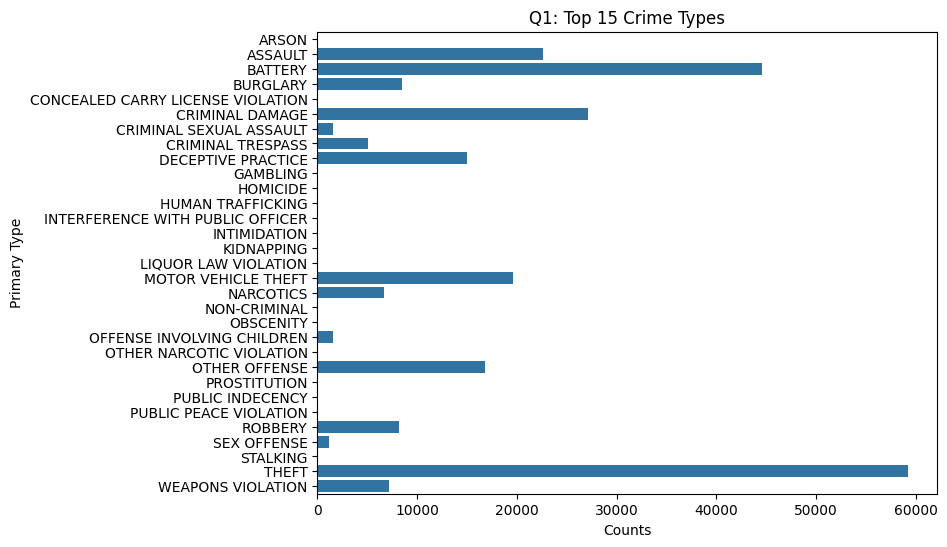

In [12]:
# Visualization: horizontal bar plot of top 15
top_types = cc['Primary Type'].value_counts().nlargest(15)
plt.figure(figsize=(8,6))
sns.barplot(x=top_types.values, y=top_types.index)
plt.title('Q1: Top 15 Crime Types')
plt.xlabel('Counts')
plt.show()

<hr>
<h2>Insight:</h2>
<h3>The data shows that most crimes are property-related, with theft standing out as the most common by a wide margin. Other frequent offenses include battery, criminal damage, burglary, and motor vehicle theft, reflecting both personal conflicts and property loss. Weapons violations and drug-related crimes also rank highly, pointing to broader issues around safety and substance use. While violent crimes like assault and robbery are serious, they occur less often compared to property crimes. Overall, the crime landscape is shaped mainly by theft and property offenses, with violence and drugs adding to the picture.</h3>


<hr>

<h2># Q2: Crimes by day of week</h2>

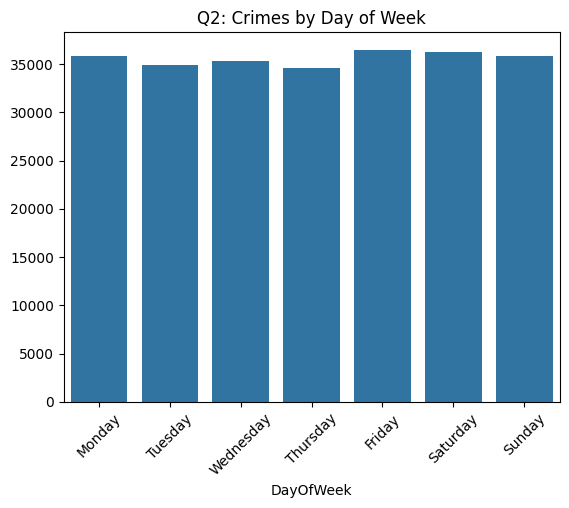

In [13]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dow = cc['DayOfWeek'].value_counts().reindex(order)
sns.barplot(x=dow.index, y=dow.values)
plt.xticks(rotation=45)
plt.title('Q2: Crimes by Day of Week')
plt.show()

<hr>
<h2>Insight:</h2>
<h3>Looking at the crime data by day of the week, it appears that crimes happen fairly consistently throughout the entire week. Friday tends to see a slight increase, which could be linked to the start of the weekend and more social activities. Interestingly, the numbers don’t drop significantly on weekends, suggesting that crime is a steady concern every day, not just on traditionally busy days. This consistency highlights the need for ongoing vigilance and community efforts to address crime regardless of the time of week.</h3>
<hr>

<h2># Q3: Compare crime counts between domestic vs non-domestic</h2>

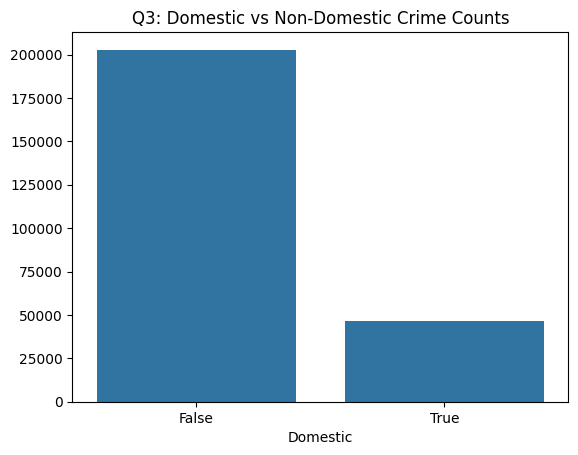

In [14]:
dom_counts = cc['Domestic'].value_counts()
sns.barplot(x=dom_counts.index.astype(str), y=dom_counts.values)
plt.title('Q3: Domestic vs Non-Domestic Crime Counts')
plt.show()

<hr>
<h2>Insight:</h2>
<h3>The data reveals a significant disparity between domestic and non-domestic crime counts, with non-domestic crimes occurring far more frequently. This suggests that crimes outside the home environment are a more prominent issue in the area studied. It highlights the importance of focusing law enforcement and community resources on public spaces to help reduce overall crime rates. Understanding this difference can guide better policy-making and targeted interventions to enhance neighborhood safety.</h3>
<hr>

<h2># Q4: Compare counts of top 6 Primary Types across weekdays (boxplot-like via day aggregation)</h2>

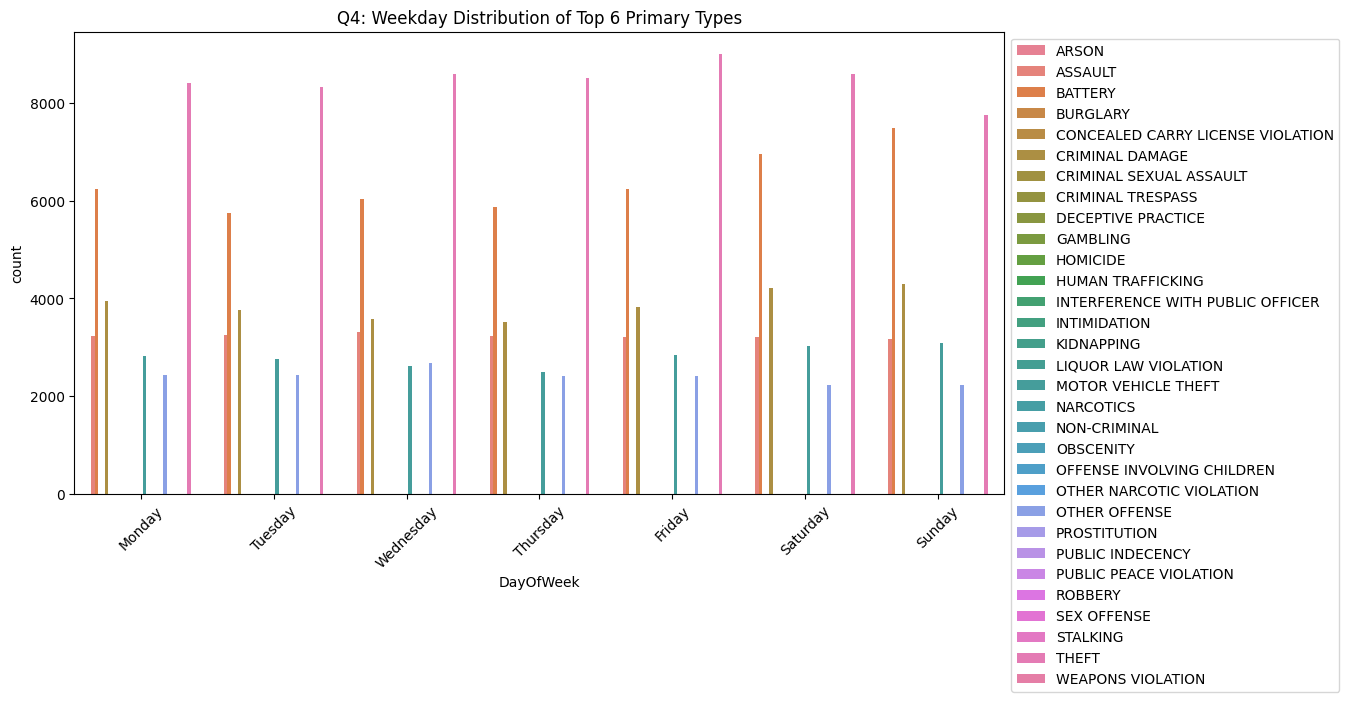

In [15]:
topp = cc['Primary Type'].value_counts().nlargest(6).index
sub = cc[cc['Primary Type'].isin(topp)]
plt.figure(figsize=(12,6))
sns.countplot(data=sub, x='DayOfWeek', hue='Primary Type', order=order)
plt.title('Q4: Weekday Distribution of Top 6 Primary Types')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

 <hr>
<h2>Insight 4.0 :</h2>
<h3>Fluctuations in Crime Types Across Weekdays
The distribution of the top 6 primary crime types varies throughout the week, revealing patterns in human behavior and societal interaction. For instance, certain crimes like assault and battery tend to peak midweek and on Fridays, which could be linked to increased social activities or stress levels during these days. This insight suggests that weekdays influence crime patterns, possibly reflecting how people's routines and social interactions change throughout the week.</h3>
<hr>
<h2>4.1 </h2>
<h3>Consistent High Counts for Certain Crime Types
Some crime types, particularly arson, assault, and battery, consistently show high counts across all weekdays, indicating that these issues are persistent and not confined to specific days. This continuous presence suggests an underlying social problem that requires ongoing attention from law enforcement and community programs. It highlights that interventions cannot be limited to weekends or specific days but should be an active part of daily community safety strategies.
</h3>
<hr>

<h2># Q5: Crime counts for weekends vs weekdays</h2>

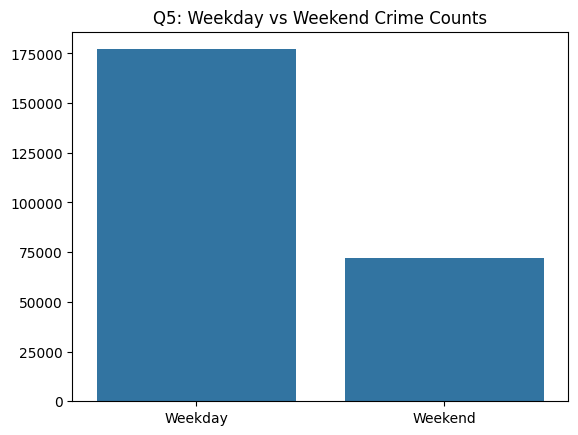

In [16]:
is_weekend = cc['DayOfWeek'].isin(['Saturday','Sunday'])
counts = is_weekend.value_counts()
sns.barplot(x=['Weekday','Weekend'], y=counts.values)
plt.title('Q5: Weekday vs Weekend Crime Counts')
plt.show()

<hr>
<h2>Insight:</h2>
<h3>This image reveals a stark difference in crime occurrences between weekdays and weekends, showing significantly higher crime counts during the weekdays. It suggests that the routines and activities associated with weekdays might be creating more opportunities for crime, possibly linked to work-related stress or busy urban life. On weekends, the drop in crimes could reflect people spending more time at home or in communal recreational spaces where crime rates tend to be lower. These insights can help communities and law enforcement better tailor their safety strategies based on daily behavioral patterns.</h3>
<hr>

<h2># Q6: Are certain crime descriptions concentrated at night? </h2>

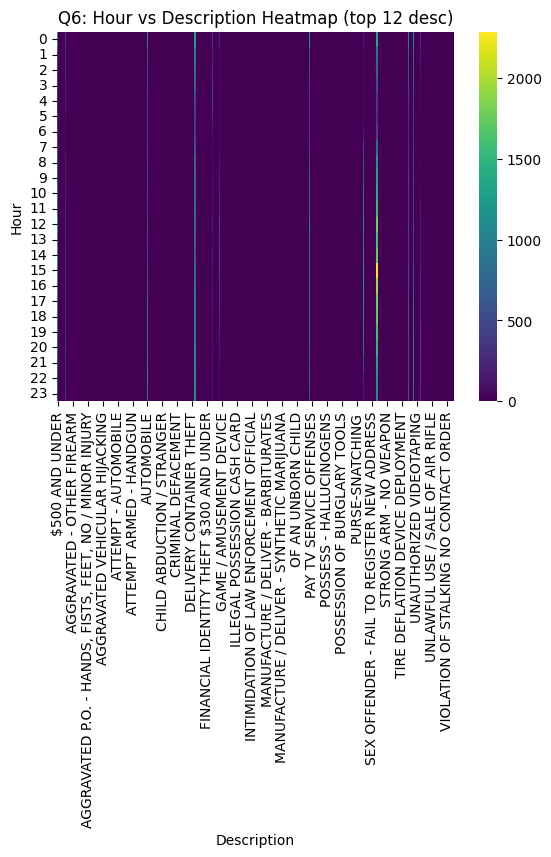

In [17]:
top_descs = cc['Description'].value_counts().nlargest(12).index
sub = cc[cc['Description'].isin(top_descs)]
ct = sub.pivot_table(index='Hour', columns='Description', values='ID', aggfunc='count').fillna(0)
sns.heatmap(ct, cmap='viridis')
plt.title('Q6: Hour vs Description Heatmap (top 12 desc)')
plt.show()

<hr>
<h2>Insight:</h2>
<h3>The heatmap provides a clear view of how certain crimes are distributed by hour, revealing that some crime types are indeed more frequent during nighttime. This suggests that activities like drug-related offenses, assaults, or burglaries might spike when fewer people are around, under the cover of darkness. It reflects a pattern where the cover of night provides both opportunity and concealment for certain unlawful behaviors. Understanding this timing can help law enforcement target their resources more efficiently and potentially increase community safety during these vulnerable hours. It also reveals the importance of nighttime vigilance for residents and businesses alike.</h3>
<hr>

<h2># Q7: Top 20 combinations of Primary Type & Arrest (counts) — stacked bar</h2>

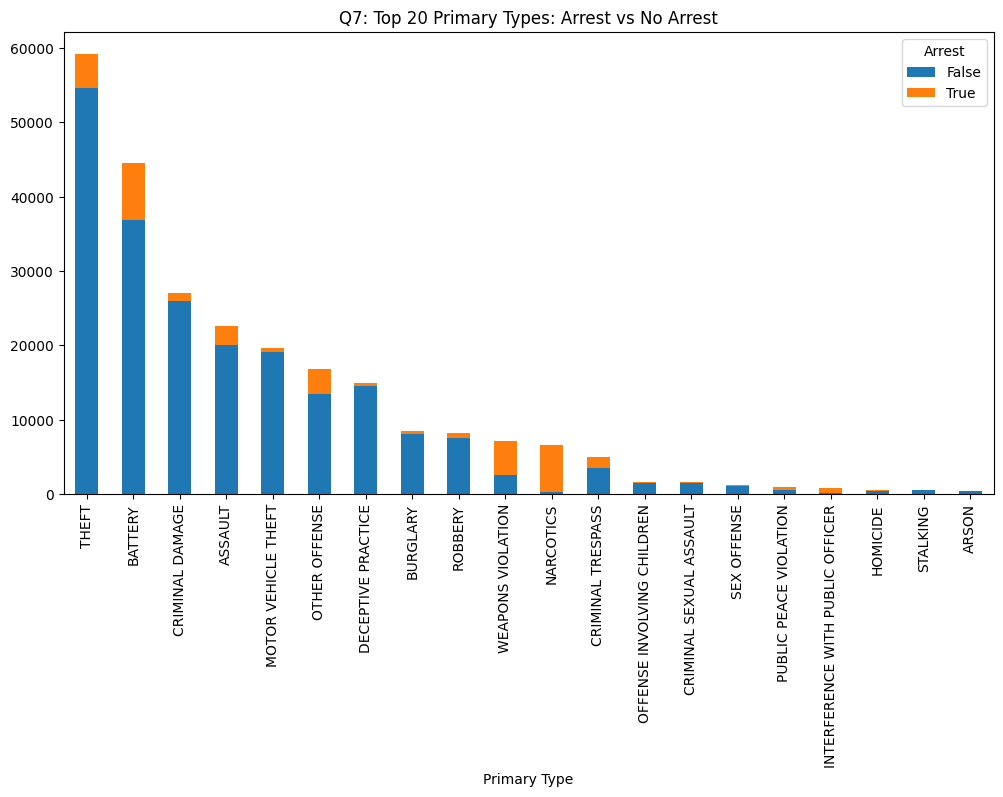

In [18]:
combo2 = cc.groupby(['Primary Type','Arrest']).size().unstack(fill_value=0).loc[cc['Primary Type'].value_counts().nlargest(20).index]
combo2.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Q7: Top 20 Primary Types: Arrest vs No Arrest')
plt.show()

<hr>
<h2>Insight:</h2>
<h3>The data reveals that theft is by far the most common crime, with a significant number of incidents not leading to arrests, highlighting the challenges in catching offenders. Battery and criminal damage also appear frequently, with a notable portion resulting in arrests, suggesting some effectiveness in law enforcement response for these crimes. Less frequent crimes like homicide and stalking have very low counts, indicating their rarity but high severity. Overall, the chart shows that while many crimes occur, arrests are made more selectively, possibly due to factors like evidence availability or seriousness of the offense.
</h3>
<hr>

<h2># Q8: How many crimes involved an arrest?</h2>

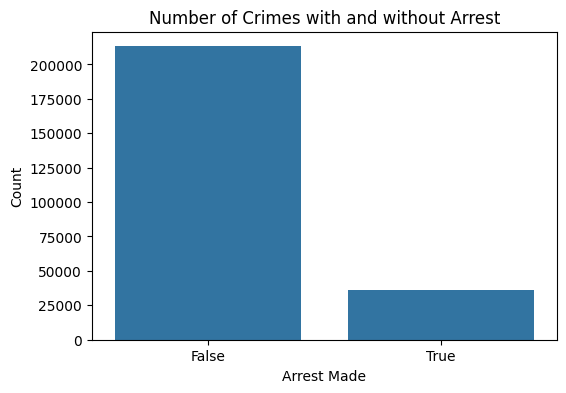

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data=cc, x='Arrest')
plt.title('Number of Crimes with and without Arrest')
plt.xlabel('Arrest Made')
plt.ylabel('Count')
plt.show()

<h2># Q9: What is the distribution of crimes by location description?</h2>

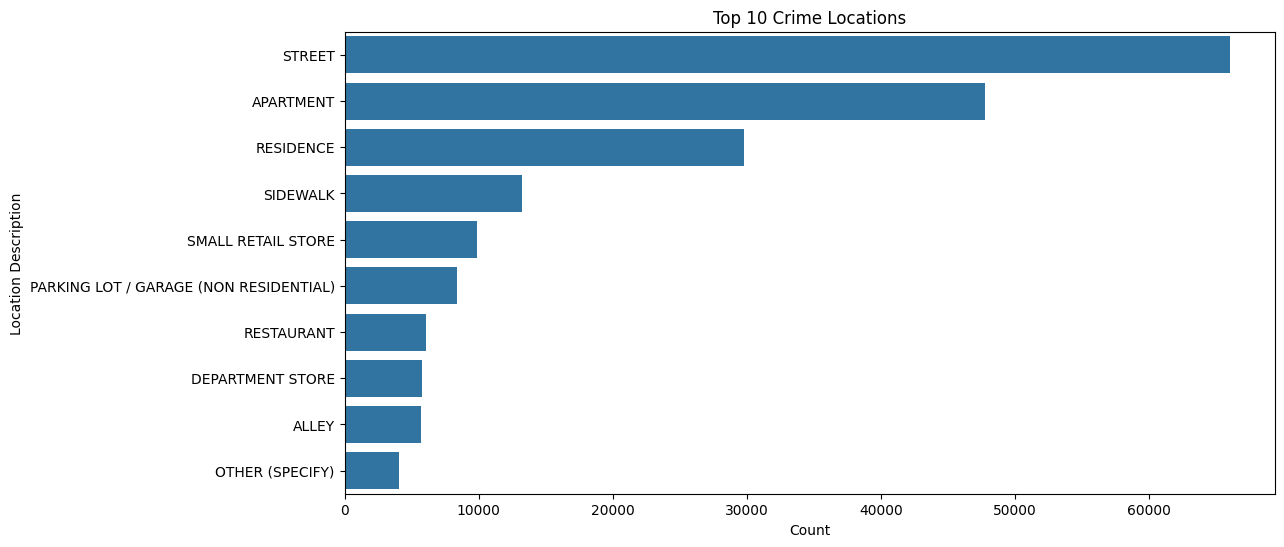

In [20]:
plt.figure(figsize=(12,6))
top_locations = cc['Location Description'].value_counts().nlargest(10).index
sns.countplot(data=cc[cc['Location Description'].isin(top_locations)], y='Location Description',
              order=top_locations)
plt.title('Top 10 Crime Locations')
plt.xlabel('Count')
plt.ylabel('Location Description')
plt.show()


<h2># Q10: What time of day do crimes mostly occur?</h2>

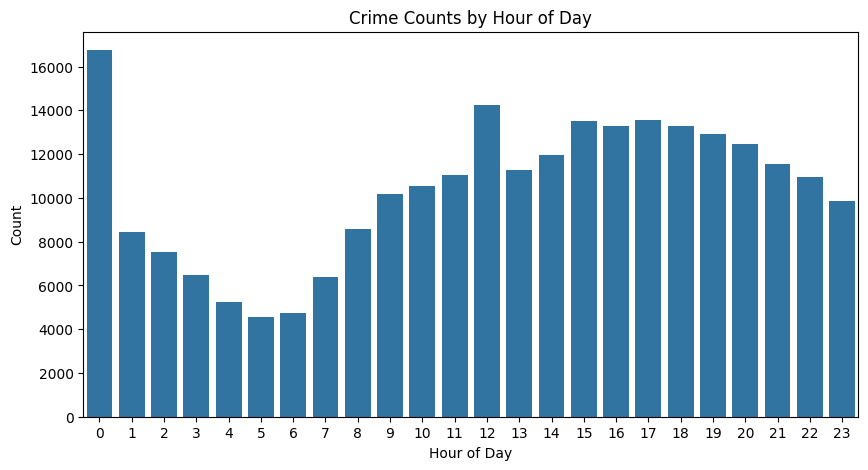

In [21]:
cc['Hour'] = cc['Date'].dt.hour
plt.figure(figsize=(10,5))
sns.countplot(data=cc, x='Hour')
plt.title('Crime Counts by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()


<h2># Q11: Distribution of crime counts by month</h2>

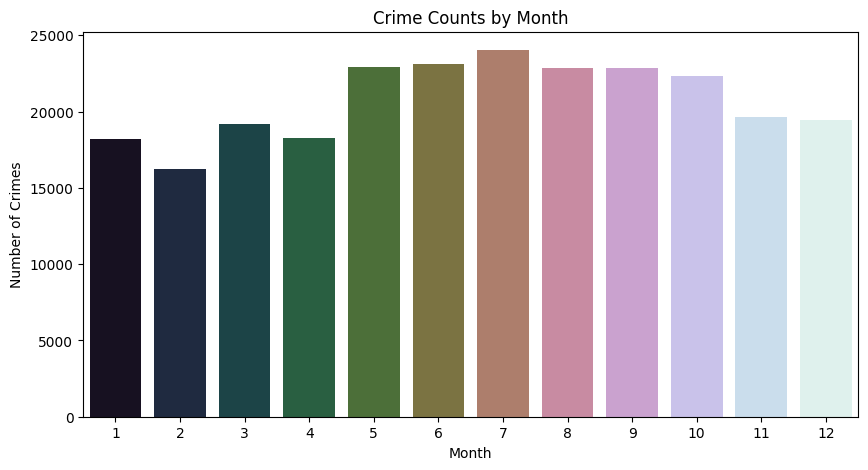

In [22]:
plt.figure(figsize=(10,5))
monthly_counts = cc['Month'].value_counts().sort_index()
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='cubehelix')
plt.title('Crime Counts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

<h2># Q12: Violin plot of crimes by hour split by arrest status</h2>

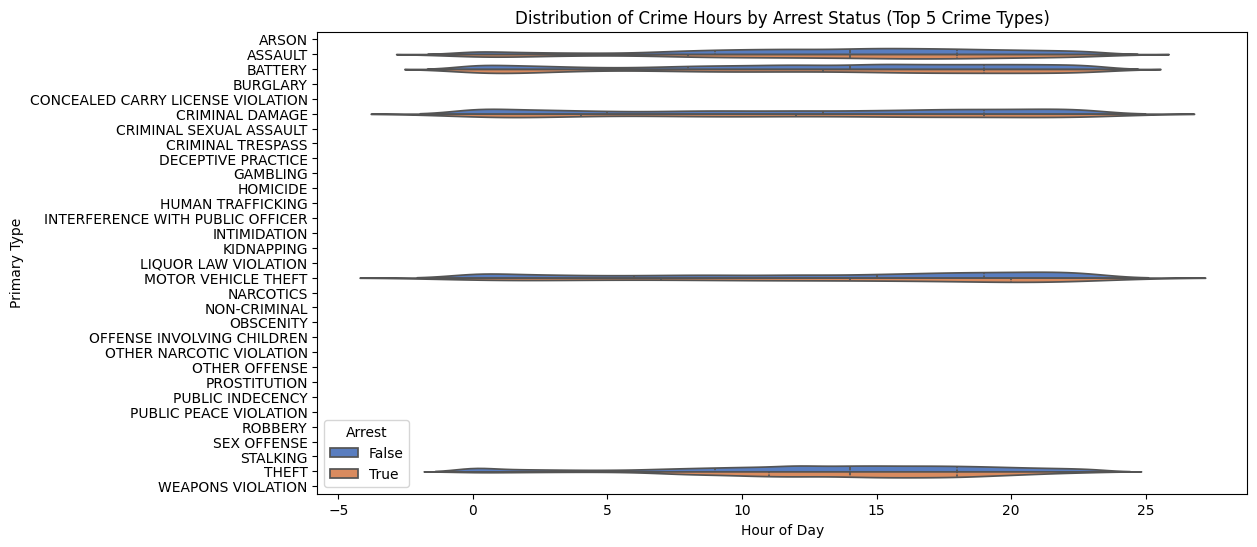

In [23]:
top5_types = cc['Primary Type'].value_counts().head(5).index

plt.figure(figsize=(12,6))
sns.violinplot(x='Hour', y='Primary Type', hue='Arrest', data=cc[cc['Primary Type'].isin(top5_types)],
               split=True, inner='quartile', palette='muted')
plt.title('Distribution of Crime Hours by Arrest Status (Top 5 Crime Types)')
plt.xlabel('Hour of Day')
plt.ylabel('Primary Type')
plt.show()

<h2># Q13: Scatter plot of crime locations colored by primary type (top 5)</h2>

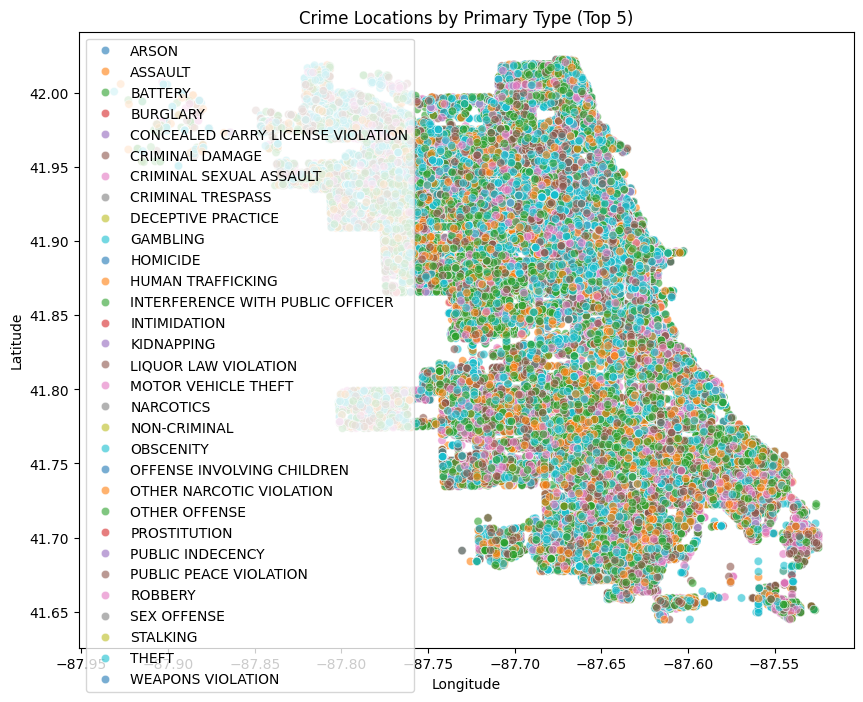

In [24]:
plt.figure(figsize=(10,8))
subset = cc[cc['Primary Type'].isin(top5_types)]
sns.scatterplot(x='Longitude', y='Latitude', hue='Primary Type', data=subset, palette='tab10', alpha=0.6)
plt.title('Crime Locations by Primary Type (Top 5)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

<h2># Q14: Which FBI Codes are most frequent? (Top 10)</h2>

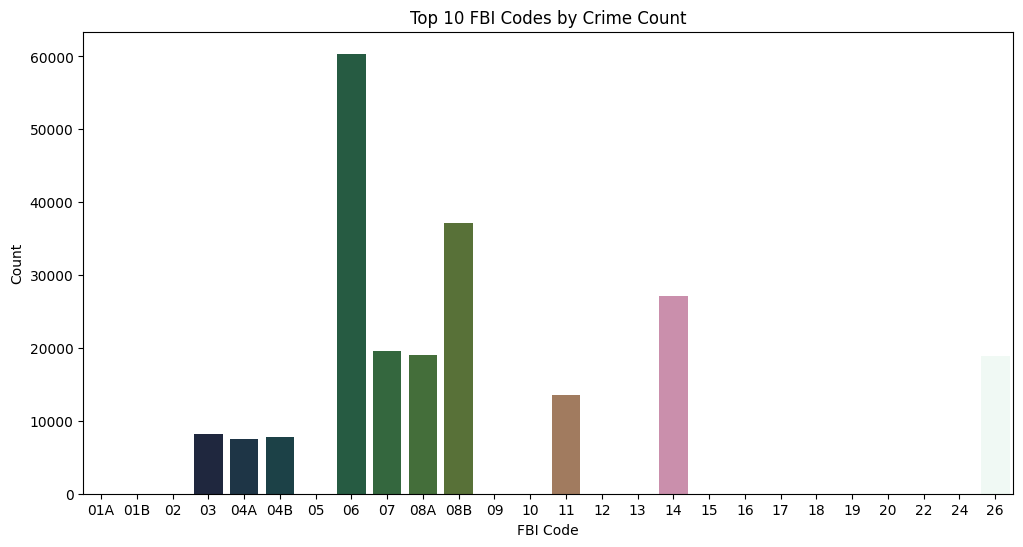

In [25]:
plt.figure(figsize=(12,6))
top_fbi = cc['FBI Code'].value_counts().nlargest(10)
sns.barplot(x=top_fbi.index, y=top_fbi.values, palette='cubehelix')
plt.title('Top 10 FBI Codes by Crime Count')
plt.xlabel('FBI Code')
plt.ylabel('Count')
plt.show()

<h2># Q15: Count of crimes by Beat (top 15 beats))</h2>

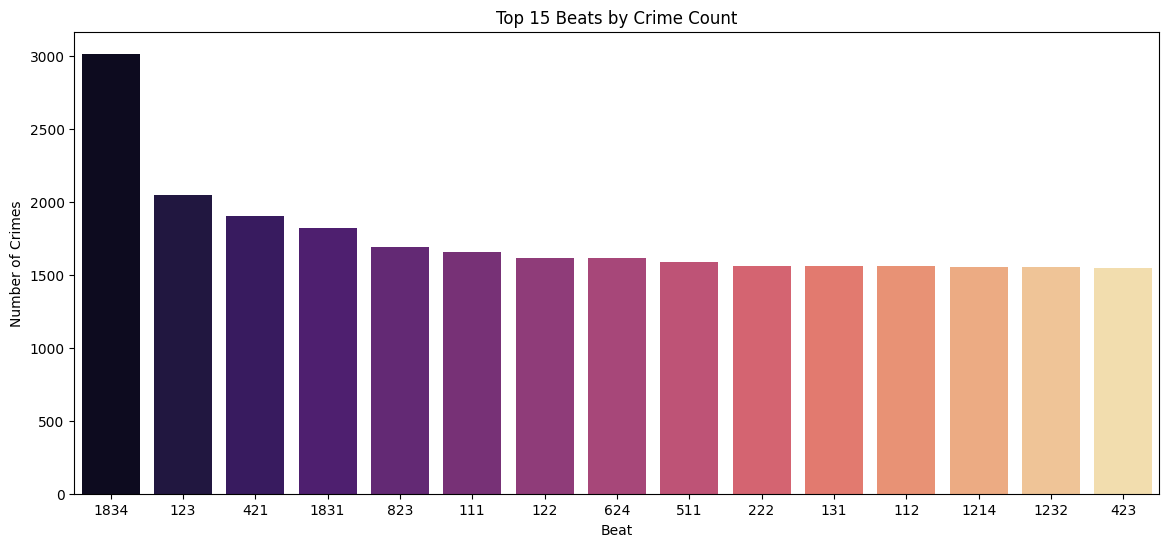

In [26]:
plt.figure(figsize=(14,6))
top_beats = cc['Beat'].value_counts().nlargest(15)
sns.barplot(x=top_beats.index.astype(str), y=top_beats.values, palette='magma')
plt.title('Top 15 Beats by Crime Count')
plt.xlabel('Beat')
plt.ylabel('Number of Crimes')
plt.show()

<h2>Year-over-year trend in property crimes (theft, burglary, robbery)?</h2>

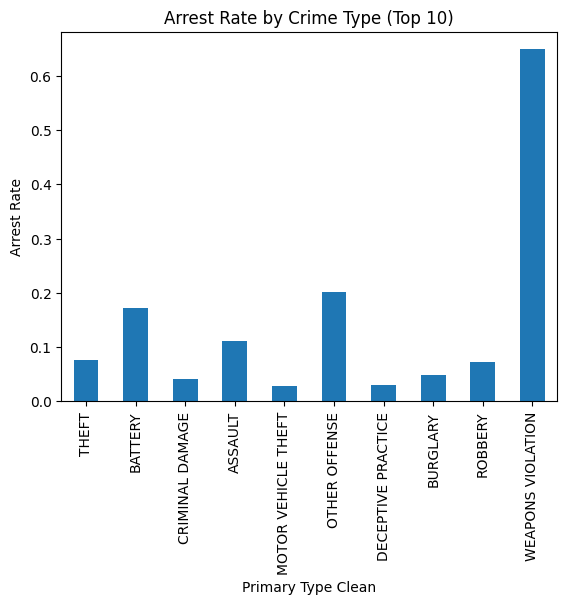

In [27]:
cc['Primary Type Clean'] = cc['Primary Type'].str.upper().str.strip()

type_arrest = cc.groupby('Primary Type Clean')['Arrest'].agg(['sum','count'])
type_arrest['rate'] = type_arrest['sum'] / type_arrest['count']

type_arrest.sort_values('count', ascending=False).head(10)['rate'].plot(kind='bar')
plt.title('Arrest Rate by Crime Type (Top 10)')
plt.ylabel('Arrest Rate')
plt.show()

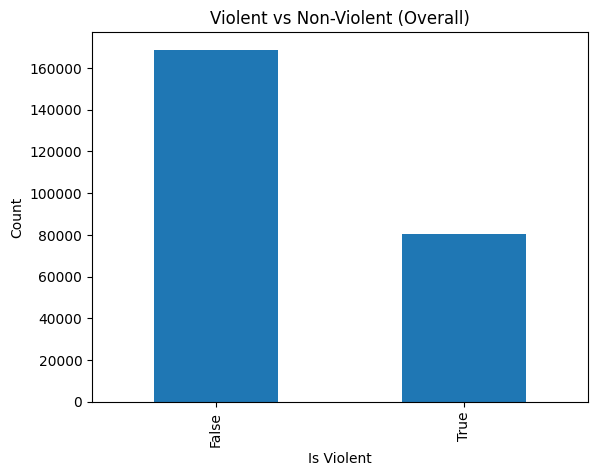

In [28]:
#Comparison of violent vs. non-violent crimes by count.
violent_types = [
    'HOMICIDE', 'BATTERY', 'ASSAULT', 'ROBBERY', 'CRIMINAL SEXUAL ASSAULT',
    'SEX OFFENSE', 'KIDNAPPING', 'OFFENSE INVOLVING CHILDREN'  # Add more if needed
]
# 16. Violent vs Non-violent (overall)
cc['IsViolent'] = cc['Primary Type Clean'].isin(violent_types)
cc['IsViolent'].value_counts().plot(kind='bar')
plt.title('Violent vs Non-Violent (Overall)')
plt.xlabel('Is Violent')  # Optional: Better label
plt.ylabel('Count')       # Optional: Better label
# Save the figure with a proper filename (incorporating '16' as prefix)
plt.savefig('16_Violent_vs_nonviolent.png', dpi=300, bbox_inches='tight')  # dpi for higher quality, bbox_inches to fit labels
# Display the plot in Jupyter (optional; remove if you only want to save)
plt.show()

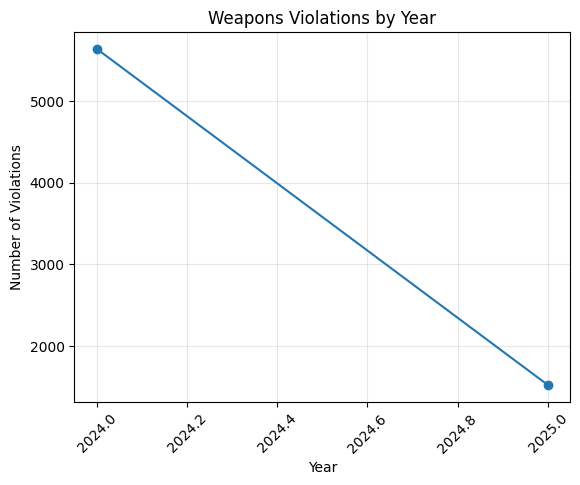

In [29]:
#Firearm-related crimes trend.
#17. Weapons violations trend
weapons_data = cc[cc['Primary Type Clean'].str.contains('WEAPONS', case=False, na=False)]
weapons_trend = weapons_data.groupby('Year').size()
# Plot
weapons_trend.plot(kind='line', marker='o')  # Line plot with markers
plt.title('Weapons Violations by Year')
plt.xlabel('Year')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.grid(True, alpha=0.3)  # Optional grid
# Save with correct syntax (use '17' as filename prefix)
plt.savefig('17_Weapons_trend.png', dpi=300, bbox_inches='tight')
# Display in Jupyter (optional)
plt.show()

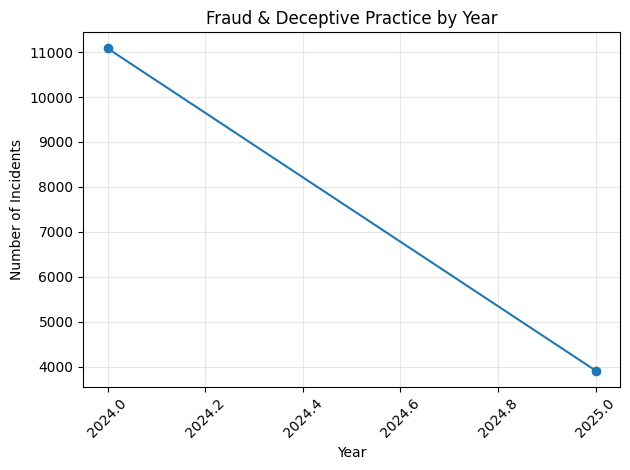

In [33]:
#Fraud and deception trends.
fraud_types = ['DECEPTIVE PRACTICE', 'FRAUD'] 
fraud = cc[cc['Primary Type Clean'].isin(fraud_types)]
fraud_trend = fraud.groupby('Year').size()
# Plot the trend
fraud_trend.plot(kind='line', marker='o')  # Line with markers for clarity
plt.title('Fraud & Deceptive Practice by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)  # Rotate labels if crowded
plt.grid(True, alpha=0.3)  # Optional subtle grid
plt.tight_layout()  # Fit elements properly
# Save with correct syntax (use '18' as filename prefix)
plt.savefig('18_Fraud_trend.png', dpi=300, bbox_inches='tight')  # PNG; change to .pdf if preferred
# Display in Jupyter (optional; remove if only saving)
plt.show()